<a href="https://colab.research.google.com/github/karsarobert/MachineLearning2025/blob/main/PTE_ML12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A mesterséges intelligencia matematikai alapjai gyakorlat
# PTE Gépi tanulás

## 12. Gyakorlat: Nem felügyelt tanítási módszerek
### 2025. december 01.

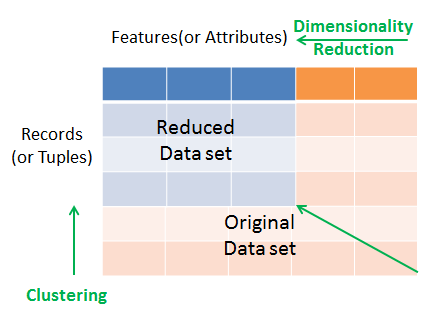

Eddig főként a *felügyelt tanulási* módszerekkel foglalkoztunk, ahol címkézett adatok alapján próbáltunk előrejelzéseket tenni. Most egy másik izgalmas területre lépünk: a **felügyelet nélküli tanulás** világába. Itt nincsenek előre megadott "helyes válaszok" vagy címkék; a célunk az, hogy magukban az adatokban rejlő szerkezetet, mintázatokat és érdekes tulajdonságokat tárjuk fel.

Ebben a kontextusban az egyik legelterjedtebb és legfontosabb algoritmus a **Főkomponens Analízis (Principal Component Analysis, PCA)**. A PCA alapvető célja a **dimenziócsökkentés**: az adatokat egy alacsonyabb dimenziós térbe próbálja leképezni úgy, hogy közben a lehető legtöbb információt – pontosabban az adatok szórásának (varianciájának) nagy részét – megőrzi. Lényegében azokat az új, egymásra merőleges irányokat (ún. **főkomponenseket**) keresi meg az adatokban, amelyek mentén az adatok a legjobban "szétterülnek".

Bár a dimenziócsökkentés a fő célja, a PCA rendkívül sokoldalú, és számos más területen is hasznos eszköz lehet, többek között:
* **Adatvizualizáció:** Magas dimenziós adatok megjelenítése 2 vagy 3 dimenzióban a legfontosabb főkomponensek segítségével.
* **Zajszűrés:** A kisebb szórást hordozó (kevésbé fontos) főkomponensek elhagyásával csökkenthető az adatokban lévő zaj.
* **Jellemzőkivonás és -készítés:** Az eredeti változók helyett új, korrelálatlan és potenciálisan informatívabb változókat (a főkomponenseket) hozhatunk létre, amelyeket további modellezéshez használhatunk fel.

A következőkben részletesebben megvizsgáljuk, hogyan működik a PCA matematikailag (látni fogod a kapcsolatot a sajátérték felbontással és az SVD-vel!), és megnézzük gyakorlati példákon keresztül is.

Ahogy láttuk, a Főkomponens Analízis (PCA) egy hatékony eszköz az adatok dimenziójának csökkentésére. De miért is van szükség egyáltalán a **dimenziócsökkentésre**?

A modern adathalmazok gyakran rengeteg jellemzőt (oszlopot, attribútumot) tartalmaznak. Amikor a jellemzők száma (a dimenzió) nagyon magas, szembe találhatjuk magunkat a **"dimenzionalitás átkának"** nevezett jelenséggel. Ez több problémát is felvet:
* **Adatritkaság:** Magas dimenzióban az adatpontok jellemzően "messze" kerülnek egymástól, így sokkal több adatra lenne szükség a tér sűrű lefedéséhez.
* **Modell bonyolultsága:** Több jellemzővel a gépi tanulási modellek bonyolultabbá válnak, ami növeli a számítási igényt.
* **Túlillesztés (Overfitting):** Nagyobb a veszélye annak, hogy a modell a tanító adatok zaját tanulja meg a valódi mintázatok helyett.
* **Vizualizációs nehézségek:** Az ember számára a 3-nál több dimenziót nehéz (vagy lehetetlen) közvetlenül megjeleníteni.

A **dimenziócsökkentés** célja ezen problémák enyhítése azáltal, hogy az eredeti, magas dimenziós adatokat egy alacsonyabb dimenziós térbe képezzük le, miközben igyekszünk a lehető legtöbb lényegi információt megőrizni. Nem csupán jellemzők elhagyásáról van szó, hanem gyakran az adatok mögöttes, rejtett struktúrájának feltárásáról és egy tömörebb reprezentáció létrehozásáról.

A dimenziócsökkentő technikákat két fő csoportba sorolhatjuk:

1.  **Lineáris Transzformációk:** Ezek a módszerek az eredeti jellemzők lineáris kombinációiként állítják elő az új, alacsonyabb dimenziós jellemzőket. A legismertebb példák:
    * **Főkomponens Analízis (PCA)**
    * Lineáris Diszkriminancia Analízis (LDA) - *Megjegyzés: Ez egy felügyelt módszer, osztályozásra is használják.*
    * Faktoranalízis (FA)

2.  **Nemlineáris Transzformációk (Manifold Learning):** Ezek a technikák az adatok komplexebb, nem feltétlenül lineáris összefüggéseit és szerkezetét próbálják megőrizni az alacsonyabb dimenzióban. Gyakran feltételezik, hogy a magas dimenziós adatok egy alacsonyabb dimenziós "sokaságon" (manifold) helyezkednek el. Példák:
    * t-SNE (t-distributed Stochastic Neighbor Embedding) - *Főként vizualizációra kiváló.*
    * Isomap (Isometric Mapping)
    * Locally Linear Embedding (LLE)
    * Spectral Embedding

A dimenziócsökkentés tehát számos **előnnyel** járhat:
* Csökkenti a redundanciát az adatokban, kiszűrheti a zajt és a kevésbé fontos jellemzőket.
* Egyszerűsítheti a gépi tanulási modelleket, ami csökkentheti a túlillesztés kockázatát.
* Felgyorsíthatja a modellek tanítási folyamatát, és csökkentheti a szükséges memória- és számítási kapacitást.
* Lehetővé teszi a magas dimenziós adatok vizuális feltárását (tipikusan 2D vagy 3D térképeken).

Ez az általános kép segít elhelyezni a PCA-t a dimenziócsökkentő eszközök palettáján, mint egy alapvető és széles körben használt lineáris módszert.

**Főkomponens Analízis (PCA) Bevezetése**

A Főkomponens Analízis (PCA) célja, hogy az eredeti változók helyett új, egymásra merőleges (ortogonális) változókat, úgynevezett **főkomponenseket** (Principal Components) hozzon létre. Ezeket a komponenseket úgy konstruálja meg, hogy az adatokban lévő **variancia** (szóródás) szerint csökkenő sorrendbe rendeződjenek.

* Az **első főkomponens** az az irány (egyenes) a többdimenziós térben, amely mentén az adatok szórása a legnagyobb. Ez ragadja meg a legtöbb információt az adatok teljes variabilitásáról.
* A **második főkomponens** az elsőre merőleges irány, amely a *maradék* varianciából a lehető legtöbbet magyarázza meg.
* Ez így folytatódik tovább: minden következő főkomponens merőleges az összes előzőre, és a fennmaradó variancia maximalizálására törekszik.

Ha a dimenziócsökkentés a cél, akkor csak az első néhány (pl. $k$ darab) főkomponenst tartjuk meg, amelyek együttesen már megmagyarázzák a teljes variancia nagy részét (pl. 95%-át). Így az eredeti, sokdimenziós adatokat egy alacsonyabb, $k$-dimenziós térben tudjuk reprezentálni, minimális információveszteséggel. Ha az összes lehetséges főkomponenst megtartanánk, az csupán az eredeti adatok egy elforgatása lenne (az új koordináta-rendszer tengelyei a főkomponensek lennének), nem járna információvesztéssel, de dimenziócsökkenéssel sem.

A PCA elvégzéséhez és megértéséhez szükségünk van néhány alapvető statisztikai fogalomra. Tekintsük át ezeket!

**Szükséges Statisztikai Fogalmak**

* **Átlag (Mean):**
    Az átlag egy adathalmaz központi tendenciáját méri. Kiszámítása egyszerű: összeadjuk az összes értéket, és elosztjuk az értékek számával. A PCA eljárás első lépése általában az, hogy minden egyes jellemzőből (oszlopból) kivonjuk annak átlagát, vagyis **centráljuk** az adatokat.

* **Szórásnégyzet (Variancia) és Szórás (Standard Deviation):**
    Ezek a mutatók azt mérik, hogy az adatok mennyire szóródnak egyetlen jellemző mentén az átlagérték körül.
    * A **variancia** az átlagtól való négyzetes eltérések átlaga. Képlete:
        *(Itt lenne a variancia képlete, pl. $\sigma^2 = \frac{\sum_{i=1}^{N}(x_i - \mu)^2}{N}$)*
    * A **szórás** egyszerűen a variancia négyzetgyöke ($\sigma$). Előnye, hogy mértékegysége megegyezik az eredeti adatok mértékegységével. Nagyobb szórás nagyobb szóródást jelent az átlag körül. Egy normális eloszlású adathalmazban az adatok kb. 68%-a az átlagtól számított egy szórásnyi távolságon belül található.

* **Kovariancia (Covariance):**
    Míg a variancia egyetlen változó szóródását méri, a kovariancia azt mutatja meg, hogy **két változó hogyan mozog együtt**, hogyan változnak egymáshoz képest.
    * **Pozitív kovariancia:** Azt jelzi, hogy ha az egyik változó értéke nő, a másik változó értéke is hajlamos nőni (és fordítva, ha az egyik csökken, a másik is).
    * **Negatív kovariancia:** Azt jelzi, hogy a két változó ellentétes irányban mozog: ha az egyik nő, a másik hajlamos csökkenni.
    * **Nulla közeli kovariancia:** Gyenge vagy nem létező lineáris kapcsolatra utal a két változó között.
    * Képlete:
        *(Itt lenne a kovariancia képlete, pl. $cov(X, Y) = \frac{\sum_{i=1}^{N}(x_i - \mu_x)(y_i - \mu_y)}{N}$)*
    * Fontos megjegyzés: Egy változó önmagával vett kovarianciája ($cov(X, X)$) megegyezik a változó varianciájával ($var(X)$).

* **Kovarianciamátrix (Covariance Matrix):**
    Egy adathalmaz kovarianciamátrixa egy négyzetes, szimmetrikus mátrix, amely az adathalmaz összes lehetséges változópárjára kiszámított kovarianciákat tartalmazza. Ha $p$ darab változónk van, a kovarianciamátrix $p \times p$-s méretű lesz.
    * A mátrix **főátlójában** (bal felső saroktól jobb alsó sarokig) az egyes változók **varianciái** találhatók ($cov(X_i, X_i) = var(X_i)$).
    * A főátlón kívüli elemek ($i \neq j$ esetén) a megfelelő változópárok ($X_i$ és $X_j$) **kovarianciáit** tartalmazzák ($cov(X_i, X_j)$). Mivel $cov(X_i, X_j) = cov(X_j, X_i)$, a mátrix szimmetrikus.
    * Általános alakja:
        *(Itt lehetne egy $p \times p$-s mátrix általános képe a $cov(X_i, X_j)$ elemekkel)*
    A kovarianciamátrix kulcsfontosságú a PCA szempontjából. A PCA lényegében ennek a mátrixnak a **sajátérték felbontásán** alapul (vagy szorosan kapcsolódik az eredeti (centrált) adatmátrix SVD-jéhez). A kovarianciamátrix **sajátvektorai** megadják a főkomponensek irányait, a hozzájuk tartozó **sajátértékek** pedig megmutatják az egyes főkomponensek által megmagyarázott varianciát. A legnagyobb sajátértékhez tartozó sajátvektor az első főkomponens iránya, és így tovább.

Ezeknek a statisztikai mérőszámoknak a pontos értéke néha kevésbé érdekes, mint a relatív nagyságuk és előjelük (különösen a kovarianciák esetében), amelyek segítenek megérteni a változók közötti kapcsolatokat. Szerencsére a modern szoftvercsomagok, mint a Python `numpy`, `scipy` és `pandas` könyvtárai, hatékony eszközöket biztosítanak ezen értékek kiszámítására.

**Gyakorlat: Alapvető Statisztikák Számítása Pythonban**

A következő lépésben egy gyakorlat keretében megnézhetnénk, hogyan számíthatók ki ezek az alapvető statisztikai fogalmak (átlag, szórás, kovariancia, kovarianciamátrix) Pythonban, a `numpy` és `pandas` csomagok segítségével. Ehhez felhasználhatjuk a korábban említett, búzafajták magjainak méréseit tartalmazó adathalmazt (terület, kerület, tömörség, maghossz, magszélesség, aszimmetria együttható, magbarázda hossza - 7 jellemző; 3 búzafajta: Kama, Rosa, Canadian).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/prasertcbs/basic-dataset/master/Seed_Data.csv')
df.head()

,A,P,C,LK,WK,A_Coef,LKG,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [ ]:
df.describe()

,A,P,C,LK,WK,A_Coef,LKG,target
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,1.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,0.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,0.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,1.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,2.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,2.000000


Nekünk csak a területre, A-ra és a maghosszra LK van szükségünk, ezért a többi oszlopot távolítsuk el.

In [ ]:
df = df[['A', 'LK']]
df.head()

,A,LK
0,15.26,5.763
1,14.88,5.554
2,14.29,5.291
3,13.84,5.324
4,16.14,5.658


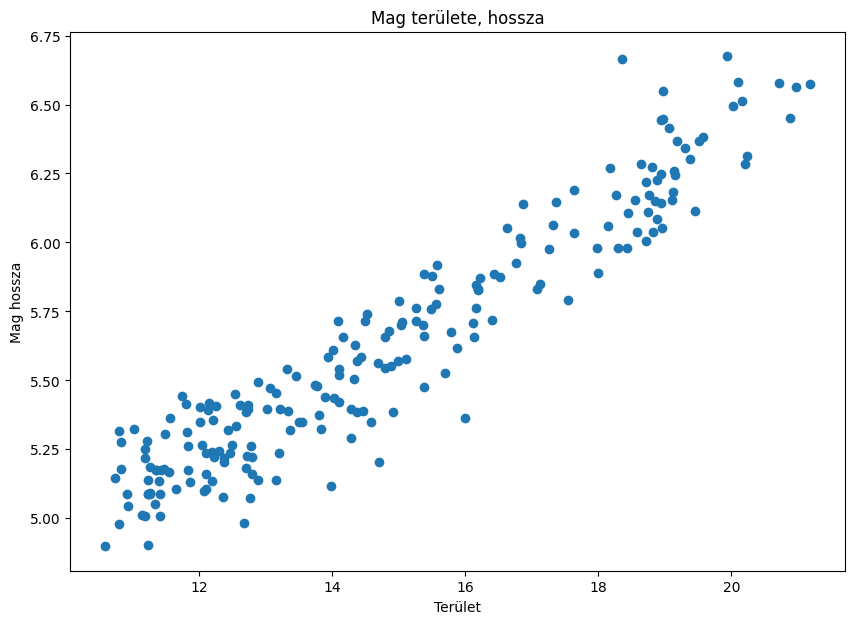

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(df['A'], df['LK']) # a terület és maghossz ábázolása pontokkal
plt.xlabel('Terület')
plt.ylabel('Mag hossza')
plt.title('Mag területe, hossza')
plt.show()

In [ ]:
df.mean() # átlag számítás

,0
A,14.847524
LK,5.628533


In [ ]:
np.mean(df.values, axis=0) # átlag számítás

array([14.84752381,  5.62853333])

In [ ]:
df.std() # szórás számítása

,0
A,2.909699
LK,0.443063


In [ ]:
np.std(df.values, axis=0) # szórás számítása

array([2.90276331, 0.44200731])

In [ ]:
df.var() # variancia számítása

,0
A,8.466351
LK,0.196305


In [ ]:
np.var(df.values, axis=0) # variancia számítása

array([8.42603482, 0.19537046])

Számítsuk ki a kovariancia mátrixot a pandas segítségével:

---



In [ ]:
df.cov() # kovariancia mátrix

,A,LK
A,8.466351,1.224704
LK,1.224704,0.196305


In [ ]:
df.values.T.shape

(2, 210)

In [ ]:
np.cov(df.values.T) # kovariancia mátrix

array([[8.46635078, 1.22470367],
       [1.22470367, 0.19630525]])

#Sajátértékek és sajátvektorok
A sajátértékek és sajátvektorok matematikai fogalma nagyon fontos a fizika és a mérnöki tudományok területén, és ezek képezik az adathalmaz főkomponenseinek kiszámításának utolsó lépéseit is. Bármely n x n méretű A négyzetmátrixnak van egy n x 1 alakú x vektora oly módon, hogy az kielégíti a következő összefüggést:
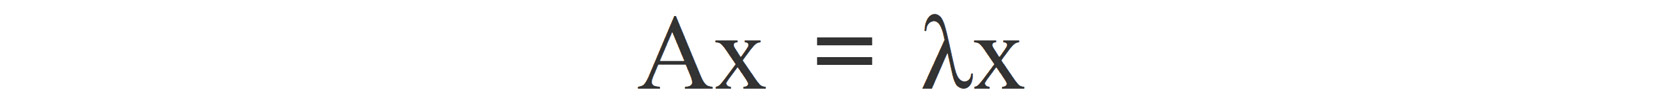

A sajátvektorok a mátrixok szorzásának egy speciális esete. λ szám akkor lesz az A mátrix sajátértéke, ha létezik olyan nemnulla X vektor, amelyre igaz, hogy Ax=λx. Ez az X vektor az A mátrix λ sajátértékhez tartozó sajátvektora.
Itt lambda kifejezés egy számérték, és a sajátértéket jelöli, míg x a megfelelő sajátvektort. N az A mátrix rendjét jelöli. Az A mátrixnak pontosan n sajátértéke és sajátvektora lesz.

##Kovarianciamátrix (A):
A mátrixnak négyzetmátrixnak kell lennie, mielőtt sajátérték-dekompozíciónak vethető alá. Mivel a mi adatállományunk esetében a sorok száma nagyobb, mint az oszlopok száma (legyen az adatállomány alakja m x n, ahol m a sorok száma és n az oszlopok száma). Ezért nem tudjuk közvetlenül elvégezni a sajátérték-bontást. Egy téglalap alakú mátrix sajátérték-dekompozíciójának elvégzéséhez először négyzetmátrixszá alakítjuk azt a kovarianciamátrix kiszámításával. A kovarianciamátrix alakja n x n, azaz egy "n" rendű négyzetmátrix.

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/95e481dd6cc34bd3b21e0d9088d5cd97a7ebac14)

##A sajátvektorok
Azok a komponensek, amelyek hozzájárulnak az adathalmazhoz, ahogyan azt a főkomponensekről szóló szakasz első bekezdésében leírtak szerint sajátvektoroknak nevezik. Minden egyes sajátvektor az adathalmazon belüli változékonyság bizonyos mértékét írja le. Ezt a változékonyságot a megfelelő sajátérték jelzi. Minél nagyobb a sajátérték, annál nagyobb a hozzájárulás. Egy sajátvektor-mátrix n x n alakú.

##A sajátértékek
azok az egyedi értékek, amelyek leírják, hogy az egyes sajátvektorok mekkora mértékben járulnak hozzá az adathalmazhoz. A korábban leírtak szerint a legnagyobb hozzájárulást leíró egyetlen sajátvektort nevezzük főkomponensnek, és mint ilyen, a legnagyobb sajátértékkel fog rendelkezni. Ennek megfelelően a legkisebb sajátértékkel rendelkező sajátvektor járul hozzá a legkevesebb varianciával vagy információval az adatokhoz. A sajátértékek egy diagonális mátrixoat alkotnak, amelynek diagonális elemei sajátértékeket jelölnek.

A numpy lineáris algebra moduljából az eig függvény segítségével számítsuk ki a sajátértékeket és a sajátvektorokat jellemző vektorokat.

In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(np.cov(df.T))

Nézzük meg a sajátértékeket; láthatjuk, hogy az első érték a legnagyobb, tehát az első sajátvektor adja a legtöbb információt.

In [ ]:
eigenvalues #sajátértékek

array([8.64390408, 0.01875194])

Hasznos, ha a sajátértékeket az adathalmazon belüli teljes variancia százalékában nézzük. Ehhez egy kumulatív összegfüggvényt fogunk használni:

In [ ]:
eigenvalues = np.cumsum(eigenvalues)
eigenvalues

array([8.64390408, 8.66265602])

In [ ]:
CS = np.cumsum([1,2,3,4,5]) # kumulatív összegfüggvény értelmezése
CS

array([ 1,  3,  6, 10, 15])

In [ ]:
eigenvalues /= eigenvalues.max()
eigenvalues

array([0.99783531, 1.        ])

Az adatok 99%-át az első komponens tartalmazza, az első és második együtt a 100%!

In [ ]:
eigenvectors

array([[ 0.98965371, -0.14347657],
       [ 0.14347657,  0.98965371]])

Minden egyes sajátvektor az adathalmazon belüli változékonyság bizonyos mértékét írja le.

In [ ]:
eigenvectors.shape

(2, 2)

A sajátértékekből láttuk, hogy a főkomponens az első sajátvektor. Nézzük meg az első sajátvektor értékeit:

In [ ]:
P = eigenvectors[0]
P

array([ 0.98965371, -0.14347657])

In [ ]:
print(P.shape)
print(df.shape)


(2,)
(210, 2)


Az adathalmazt főkomponensekre bontottuk, és a sajátvektorok segítségével tovább csökkenthetjük a rendelkezésre álló adatok dimenzionalitását.

Most már alkalmazhatjuk a dimenziócsökkentési eljárást. Végezzük el a főkomponens mátrixszorzását az adathalmaz transzponáltjával.

In [ ]:
x_t_p = P.dot(df.values.T)
x_t_p

array([14.27526018, 13.92917837, 13.38301702, 12.93293812, 15.16122048,
       13.45845558, 13.73985287, 13.18637087, 15.58947756, 15.42569089,
       14.28229053, 13.10461599, 12.965921  , 12.85132003, 12.81130345,
       13.67130454, 13.11079887, 14.73467174, 13.80111402, 11.83858666,
       13.20170613, 13.17202321, 14.90964958, 11.22342981, 14.02411636,
       15.18559477, 12.11123524, 11.8341322 , 13.1690102 , 12.51942567,
       12.24132164, 14.50374139, 13.12396525, 12.9944561 , 14.0747502 ,
       15.1341101 , 15.19649564, 16.06653005, 13.83537146, 13.35791196,
       12.63259857, 12.59258199, 12.28666024, 14.49642074, 14.15321181,
       12.88589119, 14.38312109, 14.03574465, 13.84140082, 13.8915942 ,
       13.47938642, 14.80264952, 13.52011369, 13.39204265, 13.54607291,
       14.05639189, 13.53734092, 13.99315553, 14.40850975, 11.24451083,
       10.58331473, 10.41048904, 11.50383281, 12.30916598, 11.89280073,
       12.00941372, 13.38386114, 13.06028843, 13.42230283, 11.82

A mátrixszorzás végrehajtásához az adatkészlet transzponálására van szükség, mivel a mátrix belső dimenzióinak azonosnak kell lenniük a mátrixszorzáshoz. Ahhoz, hogy A ("A pont B") érvényes legyen, A alakjának m x n alakúnak, B alakjának pedig n x p alakúnak kell lennie. Ebben a példában A és B belső dimenziója egyaránt n. A kapott mátrix mérete m x p lenne.

A következő példában a PCA kimenete egy egyoszlopos, 210 mintát tartalmazó adathalmaz. Így a kezdeti adathalmaz méretét éppen felére csökkentettük, ami az adatokon belüli variancia körülbelül 99%-át tartalmazza.

Ebben a gyakorlatban egyszerűen kiszámítottuk az adathalmaz kovariancia-mátrixát anélkül, hogy előzetesen bármilyen transzformációt alkalmaztunk volna az adathalmazon. Ha a két jellemzőnek nagyjából azonos az átlaga és a szórása, ez rendben van. Ha azonban az egyik jellemző értéke sokkal nagyobb (és átlaga eltérő), mint a másiké, akkor ez a jellemző dominálhat a másik felett, amikor komponensekre bontjuk. Ez azt eredményezheti, hogy a kisebb jellemző által nyújtott információ teljesen eltűnik. Egy egyszerű normalizálási technika a kovarianciamátrix kiszámítása előtt az lenne, ha a jellemzőkből kivonnánk a megfelelő átlagokat, és így az adathalmazt nulla körül központosítanánk.

#A PCA kiszámításának folyamata
Most már minden darab készen áll a PCA elvégzéséhez, hogy csökkentsük az adathalmaz dimenzióinak számát.

A PCA elvégzésének általános algoritmusa a következő:

- Importálja a szükséges Python-csomagokat (numpy és pandas).
- Töltse be a teljes adathalmazt.
- A rendelkezésre álló adatok közül válassza ki azokat a jellemzőket, amelyeket a dimenziócsökkentéshez használni kíván.

##Megjegyzés:
Ha az adathalmaz jellemzői között jelentős skálakülönbség van; például az egyik jellemző értéke 0 és 1, a másiké pedig 100 és 1000 között mozog, akkor szükség lehet az egyik jellemző normalizálására, mivel az ilyen nagyságrendi különbségek megszüntethetik a kisebb jellemzők hatását. Ilyen helyzetben szükség lehet arra, hogy a nagyobb jellemzőt a maximális értékével ossza el.

- Számítsa ki a kiválasztott (és esetleg normalizált) adatok kovariancia mátrixát.
- Számítsa ki a kovariancia mátrix sajátértékeit és sajátvektorait.
- Rendezze a sajátértékeket (és a megfelelő sajátvektorokat) a legmagasabbtól a legalacsonyabbig.
- Számítsa ki a sajátértékeket az adathalmazon belüli teljes variancia százalékában.
- Válassza ki a sajátértékek és a megfelelő sajátvektorok számát.

##Megjegyzés:
Ebben a szakaszban a rendezett sajátértékek az adathalmazon belüli teljes variancia százalékos arányát képviselik. Mint ilyenek, ezeket az értékeket felhasználhatjuk a szükséges sajátvektorok számának kiválasztásához, akár a megoldandó problémához, akár a modellre alkalmazott adathalmaz méretének megfelelő csökkentéséhez. Tegyük fel például, hogy a PCA kimenetén belül a variancia legalább 90%-át kell figyelembe vennünk. Ekkor kiválasztanánk azon sajátértékek (és megfelelő sajátvektorok) számát, amelyek a variancia legalább 90%-át tartalmazzák.

- Szorozzuk meg az adatkészletet a kiválasztott sajátvektorokkal, és máris elkészült a PCA, ezáltal csökkentve az adatokat reprezentáló jellemzők számát.




In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
pca.fit(df)

PCA(n_components=1)

Az illesztés megtanul néhány mennyiséget az adatokból, a legfontosabbak a "komponensek" és a "magyarázott variancia":

In [ ]:
print(pca.components_)

[[0.98965371 0.14347657]]


In [ ]:
pca.explained_variance_ratio_

array([0.99783531])

In [ ]:
X_pca = pca.transform(df)
X_pca # az első főkomponenshez tartozó értékek reprezentálják az eredeti df 99%-át

array([[ 0.42750141],
       [ 0.0214464 ],
       [-0.60018363],
       [-1.04079308],
       [ 1.28333164],
       [-0.49748453],
       [-0.16529652],
       [-0.75981283],
       [ 1.8249352 ],
       [ 1.61265346],
       [ 0.42047106],
       [-0.83640254],
       [-0.97481059],
       [-1.07793343],
       [-1.11708915],
       [-0.29467893],
       [-0.92175772],
       [ 0.81919204],
       [-0.2067646 ],
       [-2.16326594],
       [-0.67618271],
       [-0.74546517],
       [ 1.02028261],
       [-2.81486584],
       [ 0.18381837],
       [ 1.35792272],
       [-1.84212229],
       [-2.11922533],
       [-0.74245216],
       [-1.39921053],
       [-1.69510565],
       [ 0.6542609 ],
       [-0.73699336],
       [-0.90438032],
       [ 0.21235683],
       [ 1.27085587],
       [ 1.36681493],
       [ 2.23857105],
       [-0.04309129],
       [-0.59487165],
       [-1.33424576],
       [-1.37340147],
       [-1.74044425],
       [ 0.68137463],
       [ 0.25265366],
       [-1

Az átalakított adatokat egyetlen dimenzióra csökkentettük. A dimenziócsökkentés hatásának megértéséhez elvégezhetjük a csökkentett adatok inverz transzformációját, és az eredeti adatokkal együtt ábrázolhatjuk:

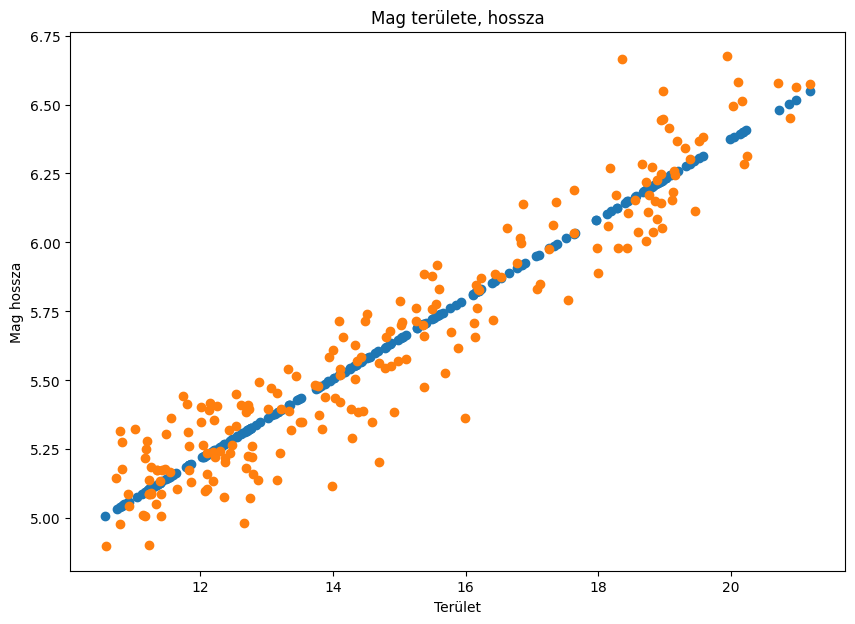

In [ ]:
X_new = pca.inverse_transform(X_pca) # adatok visszavetítése az eredeti térbe

plt.figure(figsize=(10, 7))
plt.scatter(X_new[:, 0], X_new[:, 1])
plt.scatter(df['A'], df['LK'])
plt.xlabel('Terület')
plt.ylabel('Mag hossza')
plt.title('Mag területe, hossza')
plt.show()

#PCA a vizualizációhoz: Kézzel írt számjegyek
A dimenziócsökkentés hasznossága talán nem teljesen nyilvánvaló csak két dimenzió esetén, de sokkal világosabbá válik, ha magas dimenziós adatokat vizsgálunk. Hogy ezt lássuk, vessünk egy gyors pillantást a PCA alkalmazására a számjegyek adataira.


In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

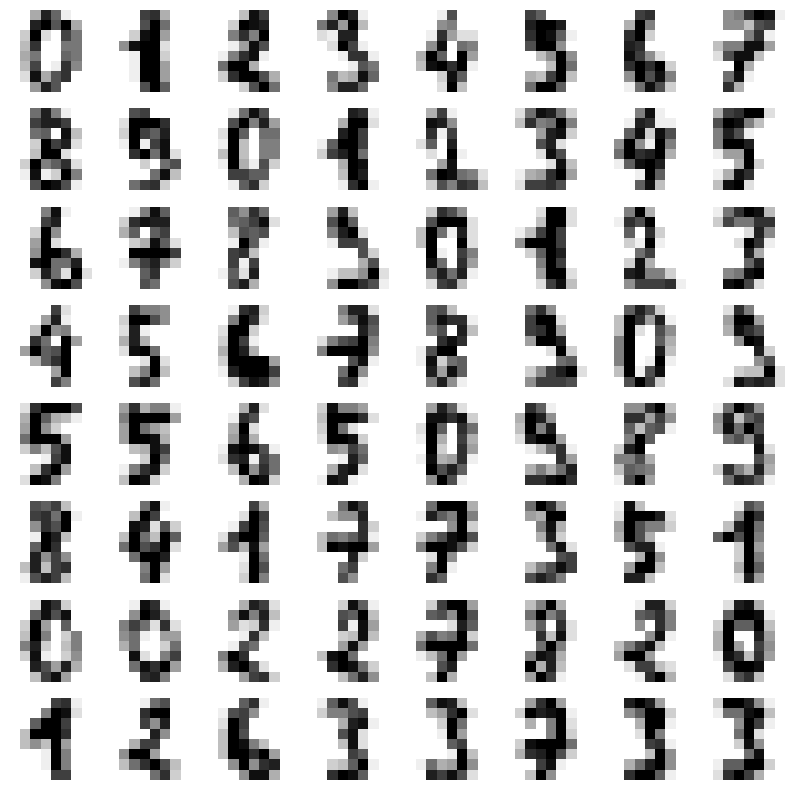

In [ ]:
from itertools import product
n_rows = 8
n_cols = 8
images = digits.images.astype(np.int_)

fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10, 10))
k = 0
for i, j in product(range(n_rows), range(n_cols)):
    image = images[n_cols * i + j]
    ax[i, j].imshow(image, cmap='binary', interpolation='nearest')
    ax[i, j].axis('off')

plt.show()
plt.close()

Emlékezzünk arra, hogy az adatok 8×8 pixeles képekből állnak, ami azt jelenti, hogy 64 dimenziósak. Ahhoz, hogy némi intuíciót nyerjünk a pontok közötti kapcsolatokról, a PCA segítségével kivetíthetjük őket egy kezelhetőbb számú, mondjuk két dimenzióra:

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


/tmp/ipython-input-2422214433.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap=plt.cm.get_cmap('Spectral', 10))


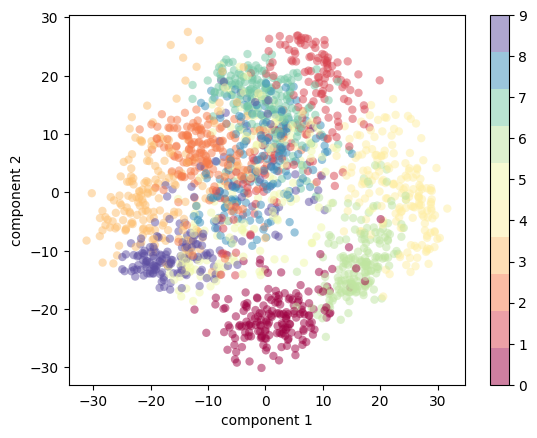

In [ ]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

Emlékezzünk vissza, mit jelentenek ezek a komponensek: a teljes adat egy 64 dimenziós pontfelhő, és ezek a pontok az egyes adatpontok vetülete a legnagyobb varianciával rendelkező irányok mentén. Lényegében megtaláltuk azt az optimális nyújtást és elforgatást a 64 dimenziós térben, amely lehetővé teszi számjegyek elrendezésének két dimenzióban való megjelenítését, és mindezt felügyelet nélküli módon - azaz a címkékre való hivatkozás nélkül - tettük.

##Az összetevők számának kiválasztása
A PCA gyakorlati használatának elengedhetetlen része, hogy meg tudjuk becsülni, hány komponensre van szükség az adatok leírásához. Ezt úgy lehet meghatározni, hogy megnézzük a kumulatív magyarázott variancia arányát a komponensek számának függvényében:

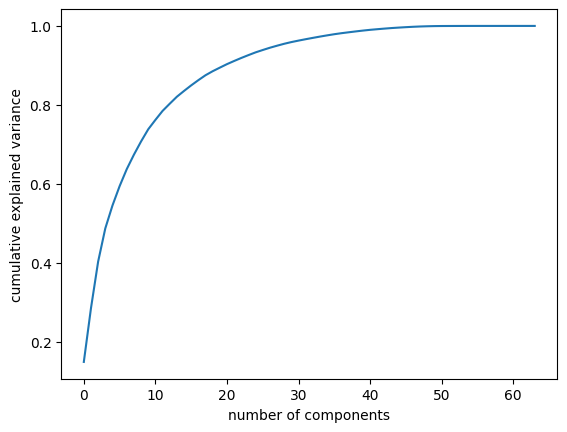

In [ ]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Ez a görbe azt mutatja meg, hogy a teljes, 64 dimenziós variancia mekkora részét tartalmazza az első N komponens. Például azt látjuk, hogy a számjegyek esetében az első 10 komponens a variancia körülbelül 75%-át tartalmazza, míg a variancia közel 100%-ának leírásához körülbelül 50 komponensre van szükség.

Itt azt látjuk, hogy a kétdimenziós vetítésünk sok információt veszít (a magyarázott variancia alapján mérve), és hogy körülbelül 20 komponensre lenne szükségünk ahhoz, hogy a variancia 90%-át megtartsuk. Ha ezt a grafikont egy nagydimenziós adathalmazra nézzük, az segíthet megérteni a több megfigyelésben jelen lévő redundancia szintjét.



#PCA mint zajszűrés
A PCA zajos adatok szűrésére is használható. Az elképzelés a következő: a zaj hatásánál sokkal nagyobb varianciájú komponenseket a zajnak viszonylag kevéssé kell befolyásolnia. Ha tehát az adatokat csak a főkomponensek legnagyobb részhalmazának felhasználásával rekonstruálja, akkor a jelet előnyben kell tartania, a zajt pedig ki kell dobnia.

Lássuk, hogyan néz ez ki a számjegyek adatainál. Először a bemeneti zajmentes adatok közül néhányat ábrázolunk:

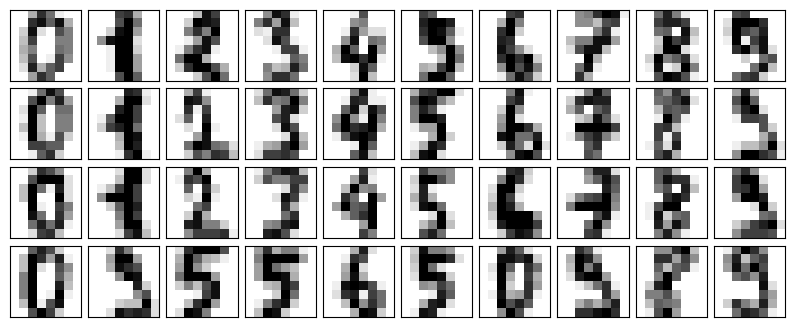

In [ ]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

Most adjunk hozzá egy kis véletlenszerű zajt, hogy létrehozzunk egy zajos adathalmazt, és ábrázoljuk újra:

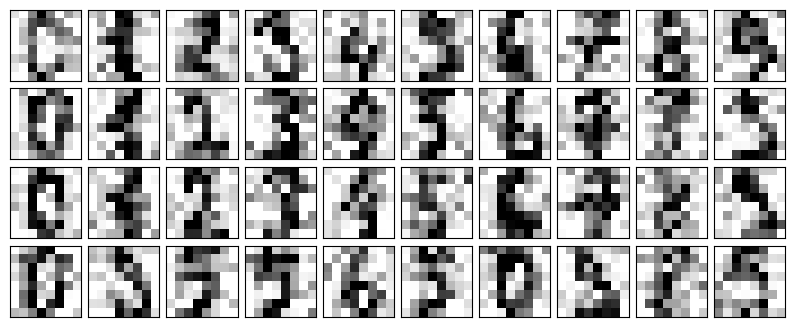

In [ ]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

Szemmel látható, hogy a képek zajosak, és hamis pixeleket tartalmaznak. Képezzünk PCA-t a zajos adatokra, kérve, hogy a vetítés a variancia 50%-át megőrizze:

In [ ]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

np.int64(12)

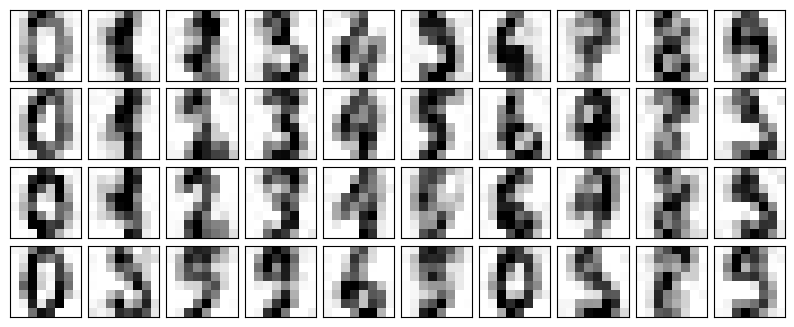

In [ ]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

Ez a jelmegőrző/zajszűrő tulajdonság teszi a PCA-t nagyon hasznos jellemzőválasztási rutinná - például ahelyett, hogy egy osztályozót nagyon nagy dimenziójú adatokon képezne ki, az osztályozót inkább az alacsonyabb dimenziójú reprezentáción képezheti ki, ami automatikusan kiszűri a bemeneti véletlenszerű zajt.

#Beadandó feladat:
dataracing.hu

df = pd.read_csv("https://raw.githubusercontent.com/karsarobert/MachineLearning2025/main/train.csv")

y = df['target_reg']

X = df.drop(['target_reg'], axis = 1)

train_test_split(x, y, test_size=0.2,random_state=42)

# A modell hibáját MAE-ben kérem megadni

Beadási határidő: 2025.12.22.


#Beadandó feladathoz
PCA felhasználása

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/karsarobert/MachineLearning2025/main/train.csv") # adatok betöltése

numerical_cols = [cname for cname in df.columns if df[cname].dtype in ['int64', 'float64']]
object_cols = [cname for cname in df.columns if df[cname].dtype in ['object']]

object_cols.append('target_reg')
num_data = df[numerical_cols].dropna()


y = num_data['target_reg'] #classifier
X = num_data.drop(['target_reg'], axis = 1) # X,y beállítása

In [ ]:
X.head()

,id,KATEGORIKUS_VALTOZO_2014,KATEGORIKUS_VALTOZO_2015,KATEGORIKUS_VALTOZO_2016,aktelh_2014,aktelh_2015,aktelh_2016,aktsajt_2014,aktsajt_2015,aktsajt_2016,...,rovkot_2016,rszem_2014,rszem_2015,rszem_2016,sajattok_2014,sajattok_2015,sajattok_2016,targyie_2014,targyie_2015,targyie_2016
0,1,0,0,0,457724.0,586098.0,643830.0,535126.0,849583.0,1234907.0,...,17326862.0,10244187.0,10726882.0,11271908.0,13450028.0,13883334.0,14386576.0,107131440.0,130146063.0,156391175.0
1,2,0,0,0,49.0,720.0,421.0,0.0,0.0,0.0,...,3496.0,11494.0,10583.0,10506.0,30300.0,33324.0,33258.0,2806.0,9464.0,7518.0
2,3,0,0,0,80.0,538.0,680.0,0.0,0.0,0.0,...,261437.0,41030.0,43769.0,44200.0,185435.0,190736.0,259307.0,162589.0,155789.0,152413.0
3,4,0,0,0,203.0,265.0,232.0,0.0,0.0,0.0,...,3340.0,10629.0,10892.0,11999.0,7850.0,8395.0,8582.0,26155.0,24763.0,25364.0
4,5,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,14777.0,8787.0,6172.0,6457.0,-287.0,-782.0,-2780.0,10319.0,8467.0,6614.0


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # adatok standardizálása 0 átlag 1 szórás
X_std = pd.DataFrame(scaler.fit_transform(X))


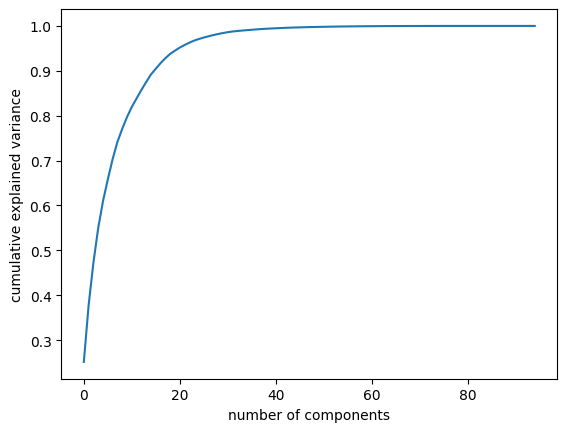

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


pca = PCA(0.95).fit(X_std)
pca.n_components_

np.int64(21)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(20)
df_pca= pca.fit_transform(X_std)
#pca.components_

In [ ]:
pca.explained_variance_ratio_

array([0.2515385 , 0.12616439, 0.09500202, 0.0771211 , 0.05998964,
       0.04812379, 0.04527425, 0.03825791, 0.02917088, 0.02629535,
       0.02257873, 0.01902108, 0.01875618, 0.01773362, 0.01689886,
       0.01272106, 0.01248232, 0.01098776, 0.00968484, 0.00712078])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_pca, y, test_size=0.2,random_state=0) # adatok felosztása 80-20 %


In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=100,
                                random_state=1)

forest.fit(X_train, y_train)



RandomForestRegressor(random_state=1)

In [ ]:
from sklearn.metrics import mean_absolute_error

pred = forest.predict(X_test)
MAE = mean_absolute_error(y_test, pred)
MAE

111790.95733122365

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

linear = LinearRegression(fit_intercept=True)
linear.fit(X_train, y_train)
predlin = linear.predict(X_test)
MAELR = mean_absolute_error(y_test, predlin)
print(MAELR)

158645.3632340791
